# Breast Cancer Klassifikation mit TABPFN
Dieses Notebook klassifiziert den Breast Cancer Datensatz mit TABPFN und visualisiert die Ergebnisse mit 2D- und 3D-PCA sowie einer GIF-Animation.

## 1. Daten laden und vorbereiten

In [37]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## 2. Klassifikation mit TABPFN

In [38]:
from tabpfn import TabPFNClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = TabPFNClassifier(device="cpu")
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"✅ Genauigkeit: {acc:.2%}")
print(classification_report(y_test, y_pred, target_names=target_names))

c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tabpfn\classifier.py:431: UserWarning: Running on CPU with more than 200 samples may be slow.
Consider using a GPU or the tabpfn-client API: https://github.com/PriorLabs/tabpfn-client
  check_cpu_warning(self.device, X)


✅ Genauigkeit: 97.37%
              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 3. 2D PCA Visualisierung

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
y_pred_all = clf.predict(X)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("📌 Wahre Klassen")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.subplot(1, 2, 2)
plt.title("🤖 Vorhergesagte Klassen (TABPFN)")
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_pred_all, cmap='coolwarm', edgecolor='k')
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

## 4. 3D-PCA GIF-Animation

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import imageio
import os

pca_3d = PCA(n_components=3)
X_pca3d = pca_3d.fit_transform(X)

os.makedirs("frames", exist_ok=True)
filenames = []

for angle in range(0, 360, 5):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X_pca3d[:, 0], X_pca3d[:, 1], X_pca3d[:, 2],
               c=y_pred_all, cmap='coolwarm', edgecolor='k', s=30)
    ax.view_init(elev=30, azim=angle)
    ax.set_title("TABPFN – PCA 3D Ansicht", fontsize=10)
    
    fname = f"frames/frame_{angle:03d}.png"
    plt.savefig(fname)
    plt.close()
    filenames.append(fname)

with imageio.get_writer("tabpfn_rotation.gif", mode='I', duration=0.1) as writer:
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)

for filename in filenames:
    os.remove(filename)

print("GIF gespeichert als: tabpfn_rotation.gif")

C:\Users\Jan\AppData\Local\Temp\ipykernel_25044\2348256266.py:26: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


✅ GIF gespeichert als: tabpfn_rotation.gif


C:\Users\Jan\AppData\Local\Temp\ipykernel_25044\1681847398.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  posterior = unnormalized_posterior / np.trapz(unnormalized_posterior, x)  # normieren


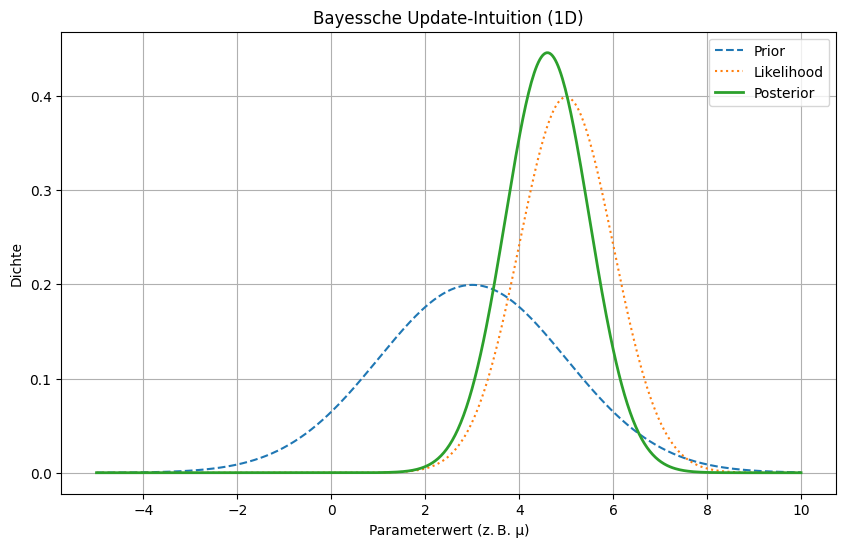

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Feature-Werte
x = np.linspace(-5, 10, 500)

# Prior über Parameter (z. B. "Klasse 1 hat Mittelwert ~3")
prior_mu = 3
prior_sigma = 2
prior = norm.pdf(x, loc=prior_mu, scale=prior_sigma)

# Likelihood aus Daten (z. B. "Daten beobachtet bei µ≈5")
likelihood_mu = 5
likelihood_sigma = 1
likelihood = norm.pdf(x, loc=likelihood_mu, scale=likelihood_sigma)

# Posterior (nicht normalisiert): Prior * Likelihood
unnormalized_posterior = prior * likelihood
posterior = unnormalized_posterior / np.trapz(unnormalized_posterior, x)  # normieren

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, prior, label="Prior", linestyle="--")
plt.plot(x, likelihood, label="Likelihood", linestyle=":")
plt.plot(x, posterior, label="Posterior", linewidth=2)
plt.title("Bayessche Update-Intuition (1D)")
plt.xlabel("Parameterwert (z. B. µ)")
plt.ylabel("Dichte")
plt.legend()
plt.grid(True)
plt.show()


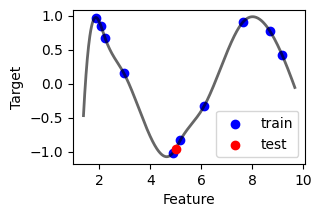

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

def plot_single_test(train_x, train_y, test_x, test_y, func=None, ax=None):
    if ax is None:
        fig, ax = plt.subplots()

    # Glatte Kurve zeichnen (z. B. Spline oder gegebene Funktion)
    x_vals = np.linspace(min(train_x.min(), test_x.min()) - 0.5,
                         max(train_x.max(), test_x.max()) + 0.5, 500)
    if func is not None:
        y_vals = func(x_vals)
        ax.plot(x_vals, y_vals, color='black', linewidth=2, alpha=0.6)

    # Trainingsdaten (schwarz)
    ax.scatter(train_x, train_y, color='blue', label='train')

    # Testpunkt (rot)
    test_y = func(test_x)
    ax.scatter(test_x, test_y, color='red', label='test', zorder=3)

    ax.set_xlabel('Feature')
    ax.set_ylabel('Target')
    ax.legend()

# Beispiel-Daten
randseed = 5
np.random.seed(randseed)
X = np.sort(np.random.rand(10) * 10)
y = np.sin(X) + np.random.normal(scale=0.1, size=X.shape)
test_x = np.array([5])
test_y = np.sin(test_x)

# Glatte Funktion (z. B. Spline)
spline = make_interp_spline(X, y)
func = lambda x: spline(x)

# Plot erzeugen
fig, ax = plt.subplots(figsize=(3, 2))  # 3×2 inches (~7.6×5.1 cm)

plot_single_test(X, y, test_x, test_y, func=func, ax=ax)
plt.show()


fig.savefig("plot_testpunkt"+str(randseed)+".png" , dpi=200, bbox_inches='tight')


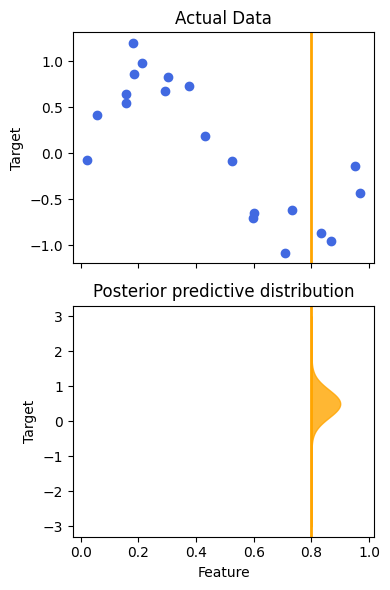

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Beispiel-Daten (trainingsdaten)
np.random.seed(42)
X = np.sort(np.random.rand(20))
y = np.sin(2 * np.pi * X) + 0.2 * np.random.randn(20)

# Testpunkt (x-Koordinate)
test_x = 0.8

# Erzeuge "Posterior predictive distribution" (hier als Normalverteilung modelliert)
posterior_mean = 0.5  # z. B. ein Modelloutput
posterior_std = 0.4
ys = np.linspace(-3, 3, 200)
pdf_vals = norm.pdf(ys, loc=posterior_mean, scale=posterior_std)

# Skaliere Dichte visuell sinnvoll für Fill-Bereich
pdf_scaled = pdf_vals * 0.1  # Skaliert damit es gut in den Plot passt

# Plot vorbereiten
fig, axes = plt.subplots(nrows=2, figsize=(4, 6), sharex=True)

# --- Oben: Trainingsdaten + vertikaler Strich für Testpunkt
axes[0].scatter(X, y, color='royalblue')
axes[0].axvline(test_x, color='orange', linewidth=2)
axes[0].set_ylabel('Target')
axes[0].set_title("Actual Data")

# --- Unten: Posterior predictive distribution als "violin"-Plot
axes[1].fill_betweenx(ys, test_x, test_x + pdf_scaled, color='orange', alpha=0.8)
axes[1].axvline(test_x, color='orange', linewidth=2)
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Target')
axes[1].set_title("Posterior predictive distribution")

# Layout-Anpassung
plt.tight_layout()
plt.savefig("pfn_forward_pass_example.svg", dpi=300, bbox_inches='tight')
plt.show()

